In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [4]:
df = pd.read_csv('./data/analisis.csv')
df.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [5]:
df.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


In [7]:
df.groupby('categoria').size()

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64

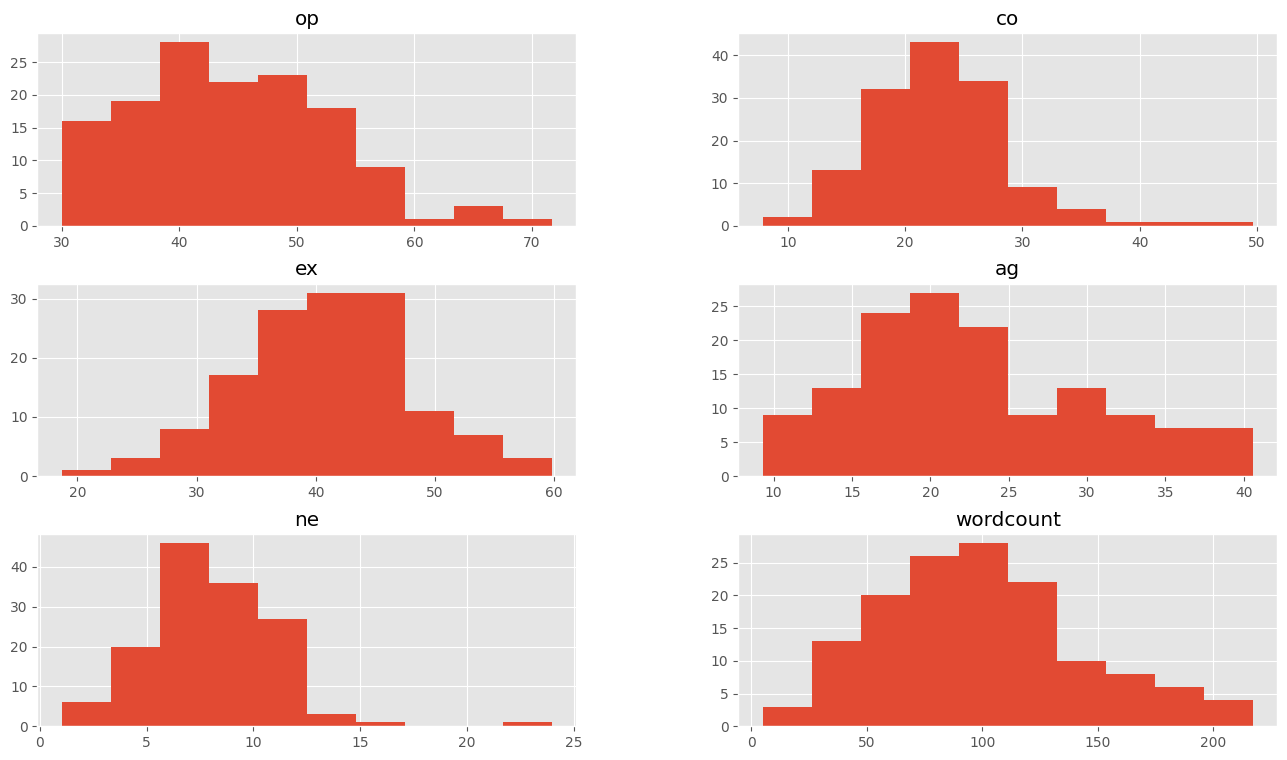

In [11]:
df.drop(['categoria'], axis=1).hist()
plt.show()

/Users/sergiorodrigo/Documents/GitHub/srodrigo23/data_trainig/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


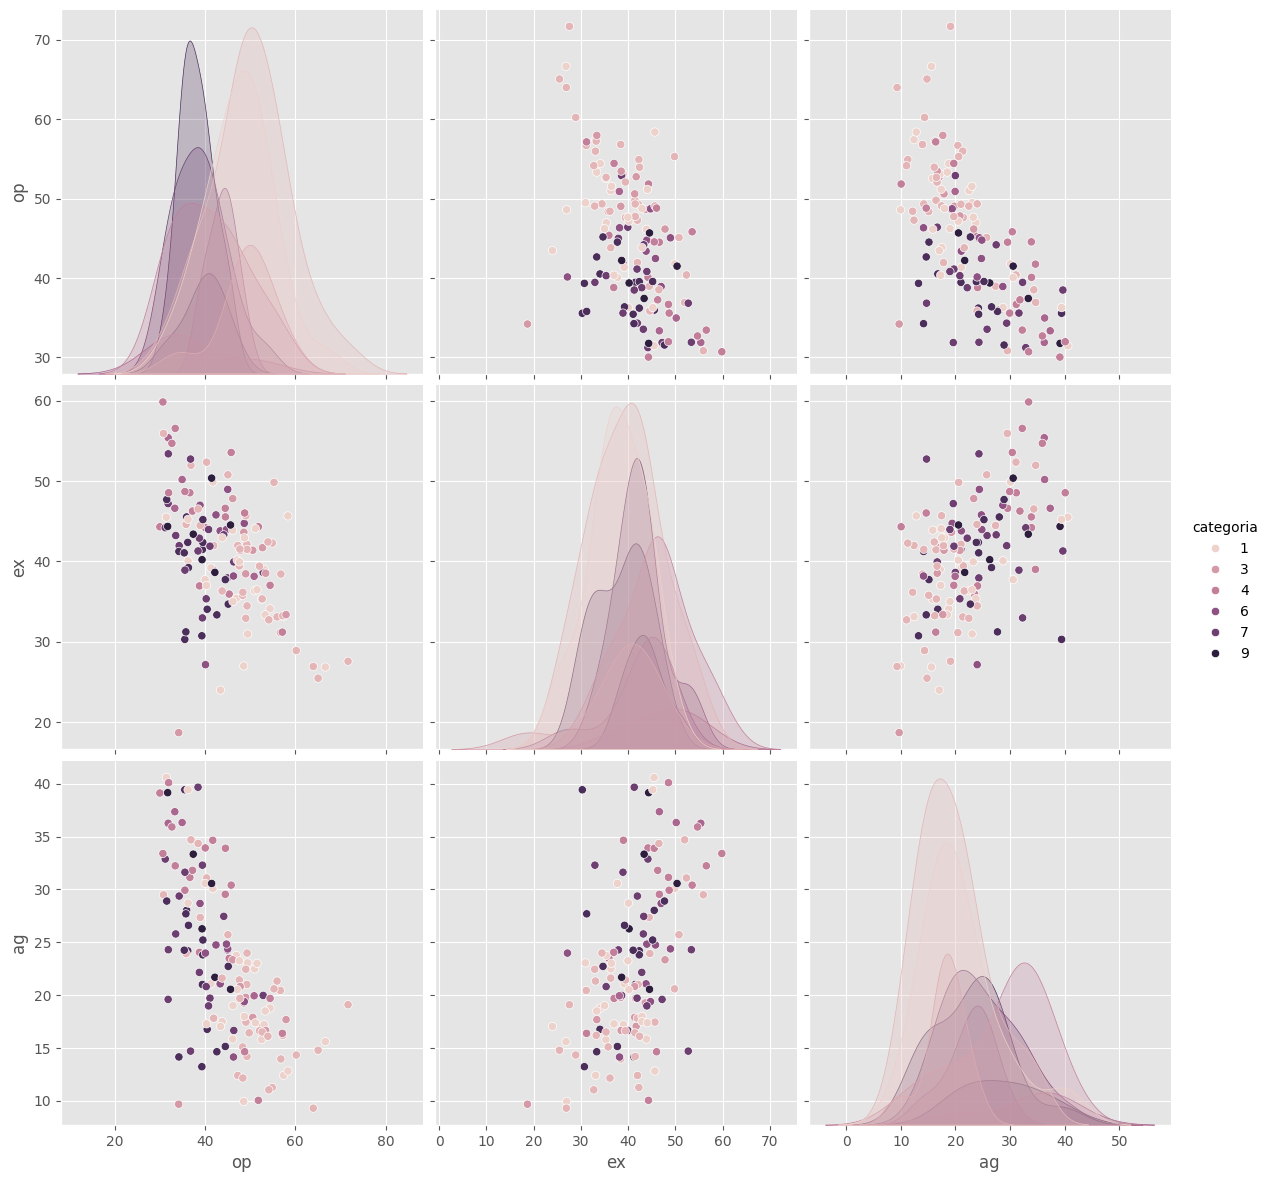

In [13]:
sb.pairplot(df.dropna(), hue='categoria', size=4, vars=["op", "ex", "ag"], kind="scatter")

# Definimos la entrada  

In [14]:
X = np.array(df[["op", "ex", "ag"]])
y = np.array(df['categoria'])
X.shape

(140, 3)

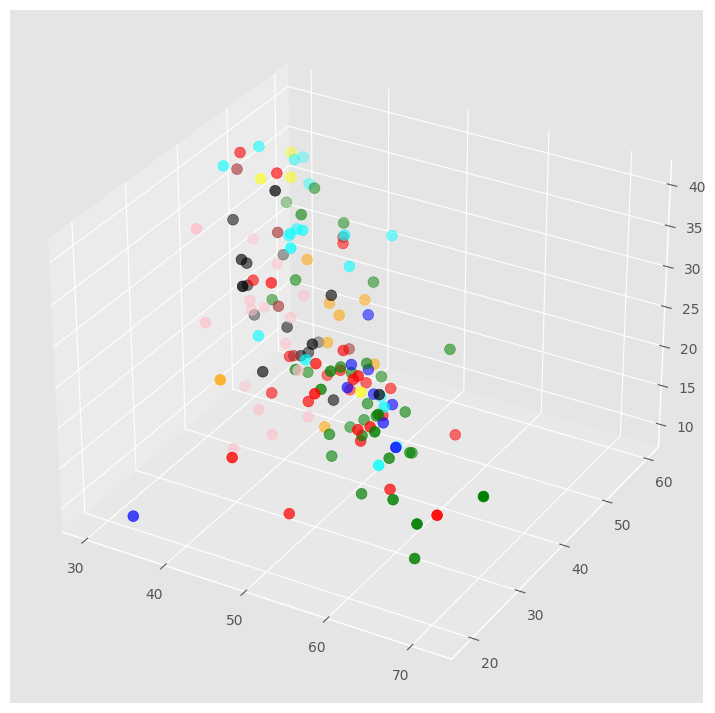

In [22]:
fig = plt.figure()
# ax = Axes3D(fig)
ax=fig.add_subplot(111,projection='3d')
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
  asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2]
           , c=asignar,s=60
           )
plt.show()

## Ejemplo de graficacion 3D

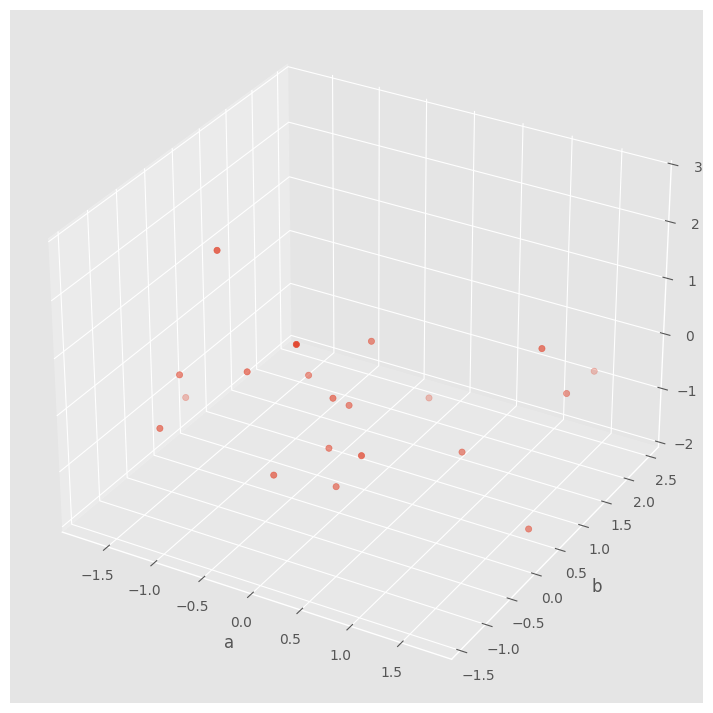

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

df_test=pd.DataFrame(data=np.random.normal(0,1,(20,3)),columns=['a','b','c'])
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df_test['a'],df_test['b'],df_test['c'])
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('c')
plt.show()

# K-means

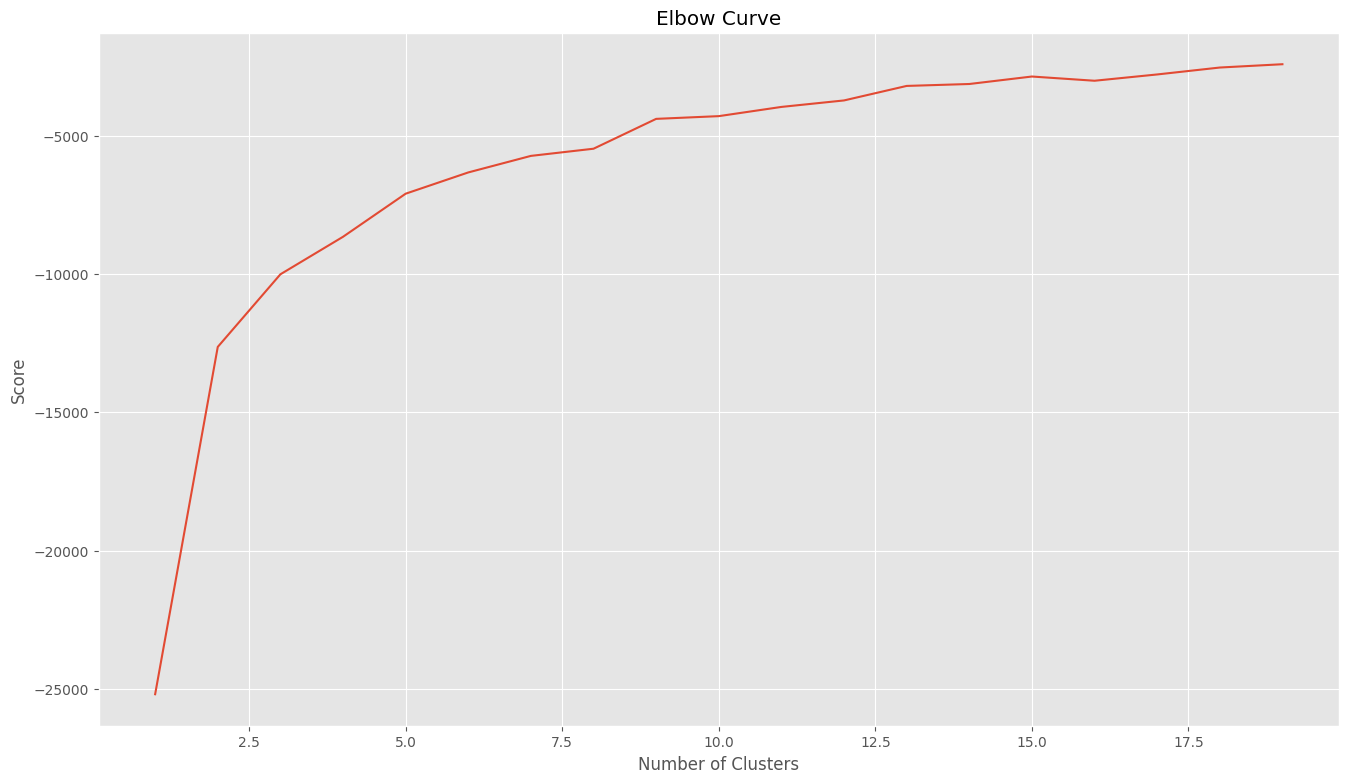

In [26]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Ejecutamos k-means

In [32]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[58.0866237  33.25132425 15.7962078 ]
 [47.96207258 40.21061815 19.00696871]
 [33.82612633 49.59771714 34.58263219]
 [39.94931645 30.885978   16.83782291]
 [39.23587064 43.60398514 27.57933486]]


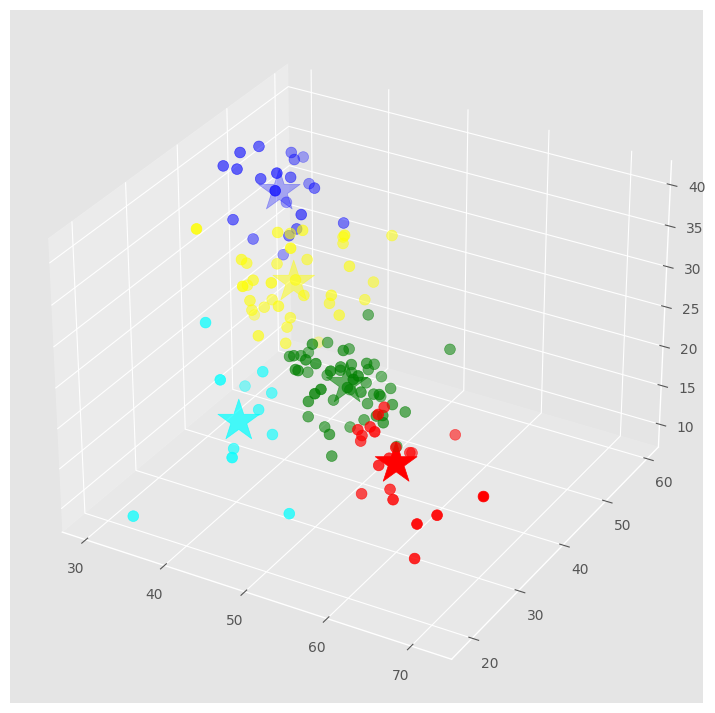

In [34]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax=fig.add_subplot(111,projection='3d')
# ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

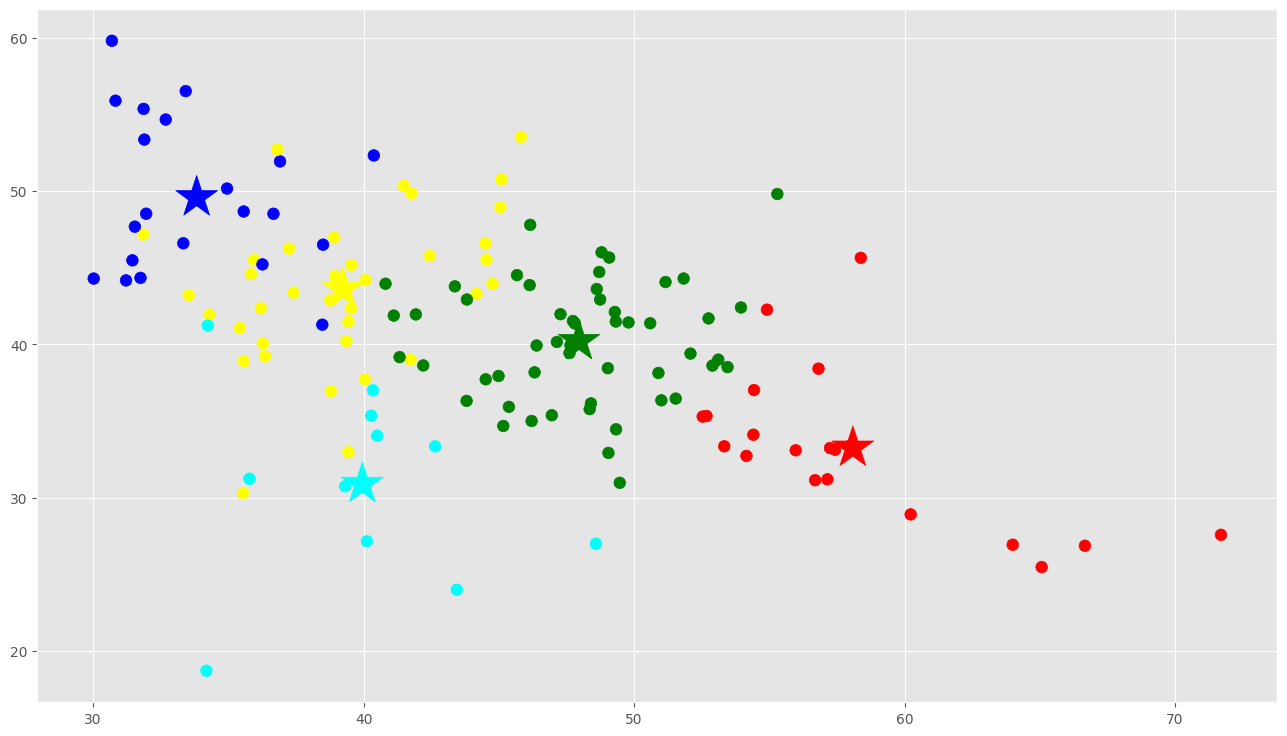

In [37]:
# Getting the values and plotting it
f1 = df['op'].values
f2 = df['ex'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

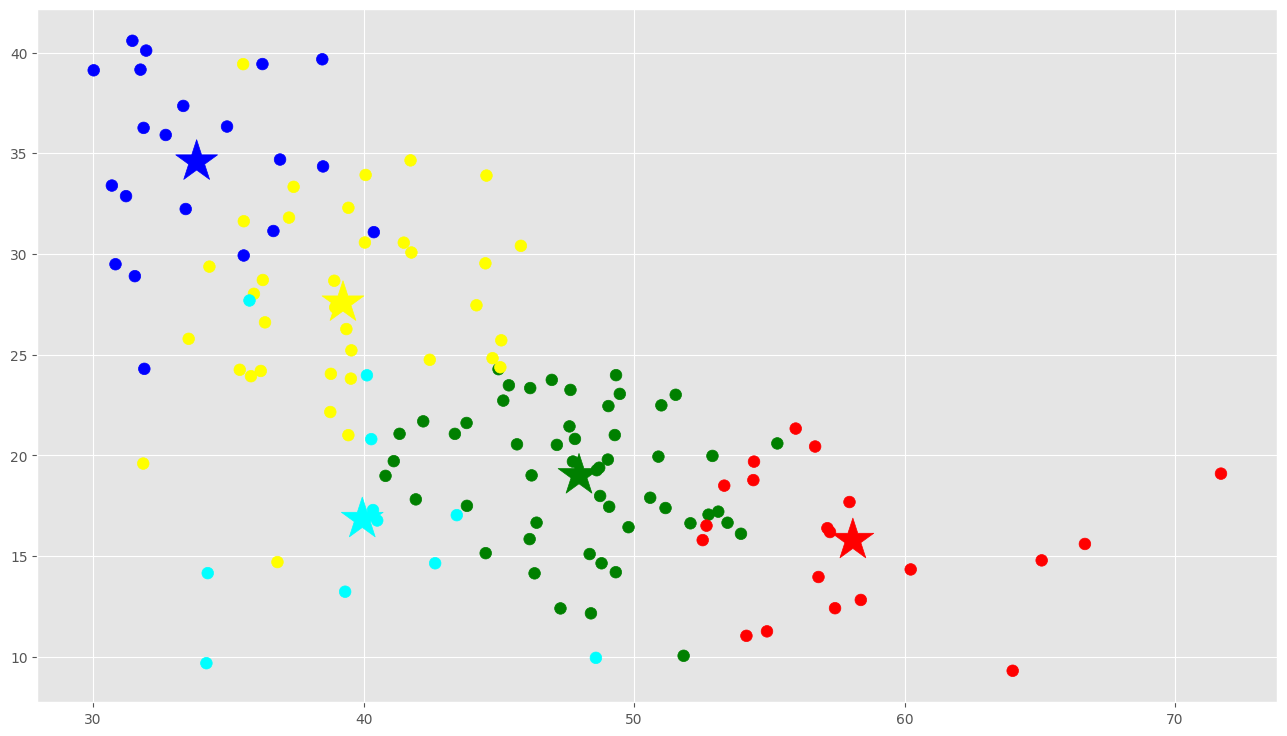

In [39]:
# Getting the values and plotting it
f1 = df['op'].values
f2 = df['ag'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

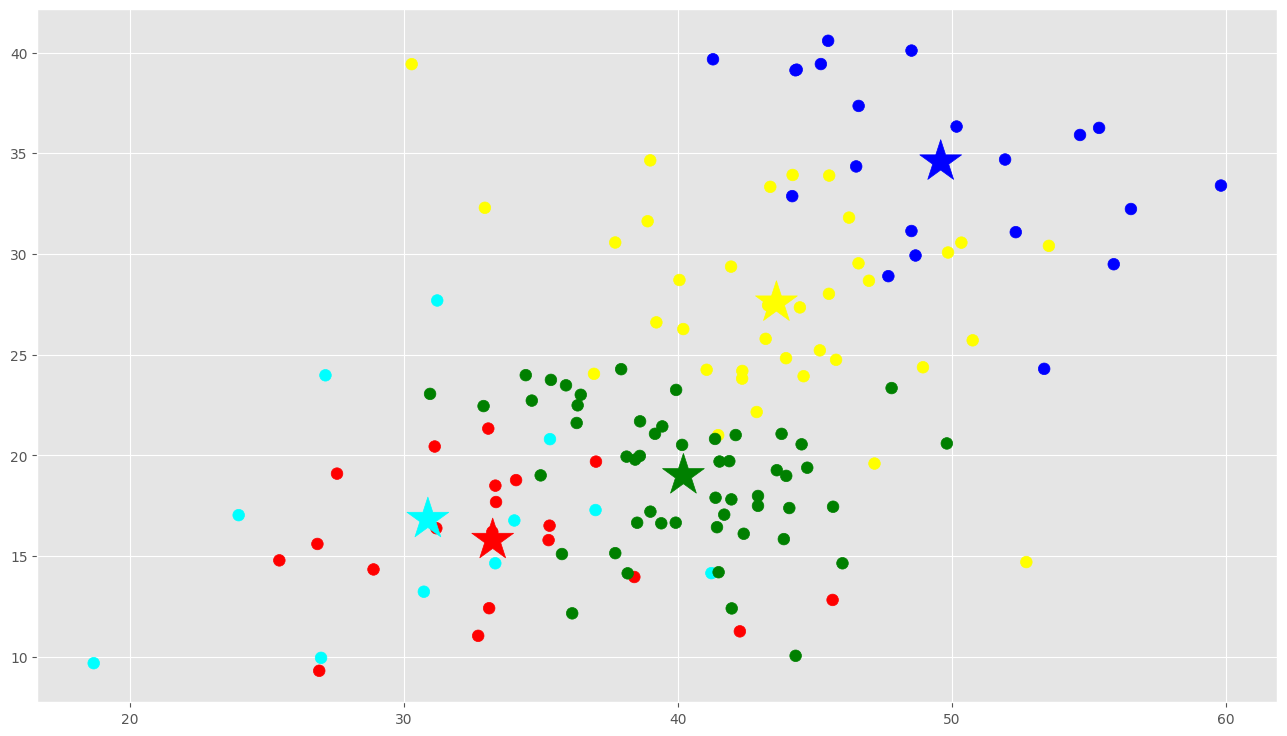

In [40]:
f1 = df['ex'].values
f2 = df['ag'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [45]:
copy =  pd.DataFrame()
copy['usuario'] = df['usuario'].values
copy['categoria'] = df['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,20
1,green,52
2,blue,21
3,cyan,11
4,yellow,36


In [46]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]

diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,6.0
2,2,11.0
3,3,1.0
4,4,2.0
5,5,NaN
6,6,NaN
7,7,NaN
8,8,NaN
9,9,NaN


In [47]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([75, 93, 35, 60, 38])

In [48]:
users=df['usuario'].values
for row in closest:
    print(users[row])

JLo
LennyKravitz
DaniMateoAgain
HillaryClinton
David_Busta


# Clasificar nuevas muestras

In [49]:
X_new = np.array([[45.92,57.74,15.66]]) #davidguetta

new_labels = kmeans.predict(X_new)
print(new_labels)

[1]


# Otro Ejemplo

(array([  2,   5,  10,  11,  12,  13,  15,  16,  17,  18,  19,  20,  22,
        23,  27,  30,  33,  34,  35,  36,  37,  38,  40,  41,  42,  46,
        48,  49,  51,  53,  58,  60,  61,  64,  66,  67,  71,  72,  73,
        77,  80,  81,  82,  85,  87,  88,  90,  92,  93,  96,  97,  98,
       104, 106, 107, 109, 110, 111, 112, 113, 115, 116, 117, 118, 125,
       126, 128, 129, 130, 131, 133, 135, 136, 137, 138, 139, 140, 144,
       145, 146, 147, 156, 158, 160, 167, 171, 173, 176, 178, 179, 185,
       188, 191, 192, 193, 194, 196, 201, 202, 203, 206, 207, 209, 210,
       211, 212, 215, 218, 222, 224, 227, 229, 230, 232, 234, 237, 240,
       241, 242, 245, 249, 250, 252, 255, 256, 259, 260, 261, 262, 264,
       265, 266, 267, 268, 269, 271, 273, 276, 277, 280, 281, 282, 283,
       287, 289, 290, 291, 293, 294, 295, 301, 304, 309, 310, 311, 313,
       314, 315, 316, 317, 318, 319, 320, 321, 323, 326, 327, 328, 330,
       332, 333, 334, 335, 336, 338, 341, 342, 347, 348, 354, 3

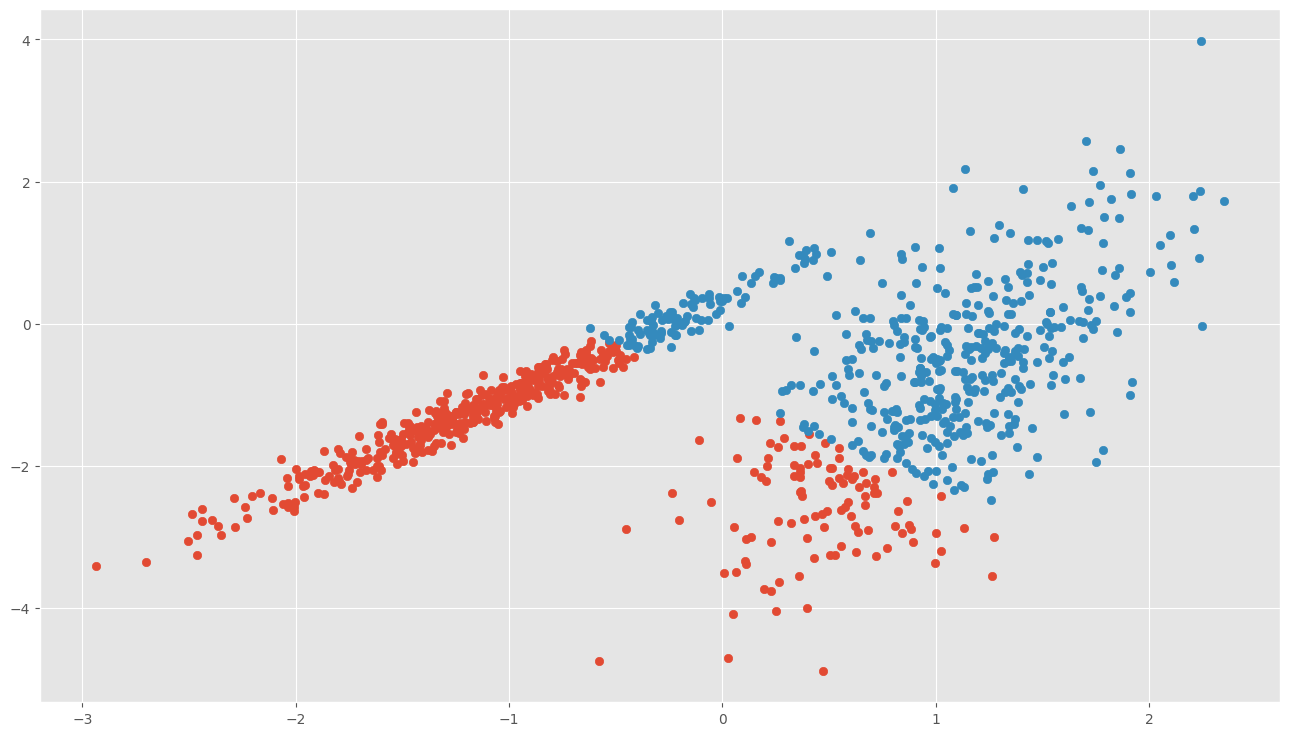

In [50]:
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans

# inicializar el conjunto de datos con el que trabajaremos
training_data, _ = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=4
)

# definir el modelo
kmeans_model = KMeans(n_clusters=2)

# Entrenar el modelo
kmeans_model.fit(training_data)

# asignar cada punto de datos a un grupo
kmeans_result = kmeans_model.predict(training_data)

# obtener todos los grupos únicos
kmeans_clusters = unique(kmeans_result)

# graficar los grupos KMeans
for kmeans_cluster in kmeans_clusters:
    # get data points that fall in this cluster
    index = where(kmeans_result == kmeans_cluster)
    # make the plot
    pyplot.scatter(training_data[index, 0], training_data[index, 1])
    print(index)

# mostrar el gráfico K-means
pyplot.show()